## 随机信号的幅值概率密度函数介绍

随机信号的幅值概率密度函数表示信号的幅值落在某一个指定区间内的概率。

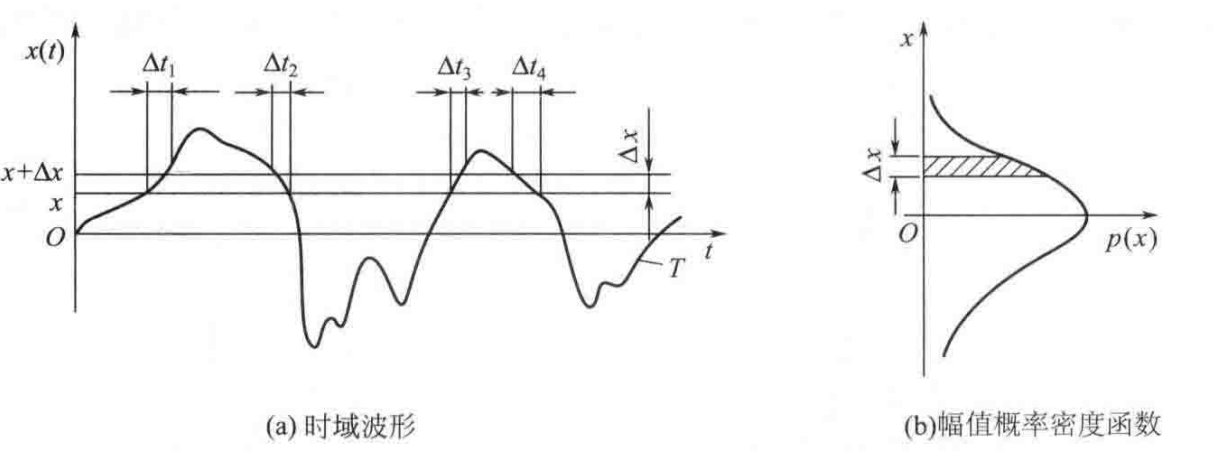

如图为时域波形及幅值概率密度。

$x(t)$值落在$x$到$x+\Delta x$之间的时间为$T_{x}=\Delta t_{1}+\Delta t_{2}+\Delta t_{3}+\Delta t_{4}$，其总的观测时间为$T$，则出现的频次可以用$T_{x} / T$

当$\Delta x$趋于零时，就得到该点的幅值概率密度函数

典型信号的时域波形和幅值概率密度函数如下图所示，根据随机过程理论，随机信号的幅值概率密度函数符合正态分布规律。

确定性信号如简谐信号的幅值概率密度函数则呈盆形曲线，如图3.2(a)所示。

一般故障信号多是随机信号和简谐信号的混合体，所以当信号幅值概率密度函数的正态分布曲线上端出现盆型漏斗时［图3. 2 C b) ] ，往往预示着系统存在故障征兆。

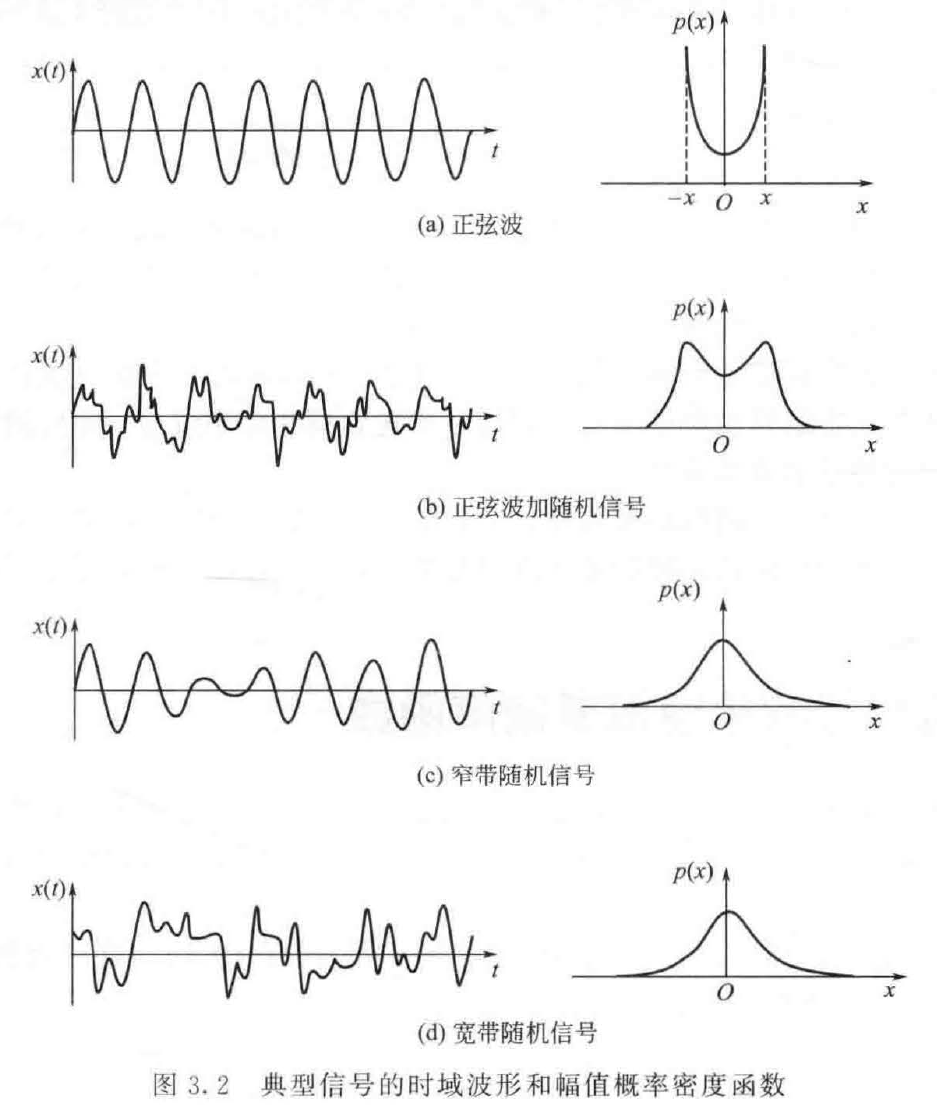

## 代码实战

### 导入包

In [5]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fftpack, stats

In [6]:
from matplotlib import rcParams

config = {
    "font.family": 'serif', # 衬线字体
    "font.size": 10, # 相当于小四大小
    "font.serif": ['SimSun'], # 宋体
    "mathtext.fontset": 'stix', # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)

### 定义CWRU数据读取函数

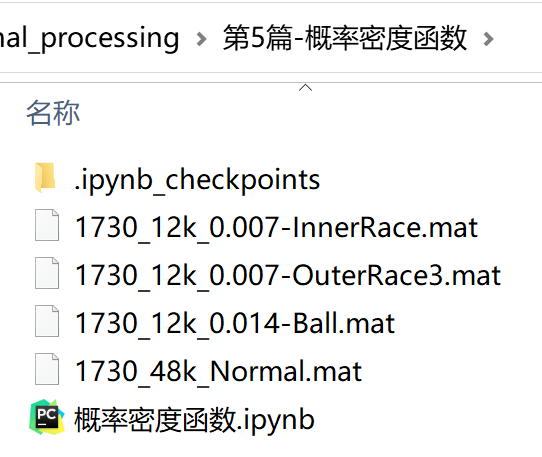

使用CWRU轴承数据进行分析，选取了4个mat文件，包括内圈故障、外圈故障、滚动体故障和正常状态。

文件名解释（以“1730_12k_0.007-InnerRace”为例）：

1730：转速，单位rpm

12k：采样频率，Hz

0.007：故障大小，单位inch，1inch=25.4mm

InnerRace：代表为内圈故障

In [7]:
def data_acquision(FilePath):
    """
    fun: 从cwru mat文件读取加速度数据
    param file_path: mat文件绝对路径
    return accl_data: 加速度数据，array类型
    """
    data = scio.loadmat(file_path)  # 加载mat数据
    data_key_list = list(data.keys())  # mat文件为字典类型，获取字典所有的键并转换为list类型
    accl_key = data_key_list[3]  # 获取'X108_DE_time'
    accl_data = data[accl_key].flatten()  # 获取'X108_DE_time'所对应的值，即为振动加速度信号,并将二维数组展成一维数组
    return accl_data

## 内圈故障幅值概率密度函数分析

### 时域图绘制

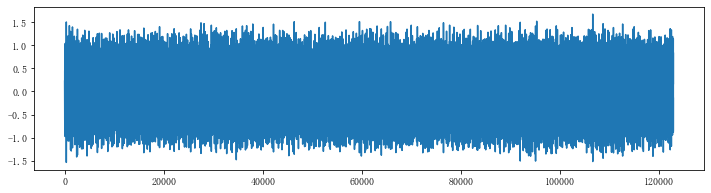

[ 0.22269856  0.09323776 -0.14651649 ... -0.36125573  0.31138814
  0.17055689]


In [28]:
file_path = r'E:/研究生/pytorch/CSDN代码/fault_diagnosis_signal_processing/第4篇-包络谱/1730_12k_0.007-InnerRace.mat'
xt = data_acquision(file_path)  #从mat文件获取振动加速度数据
##--------绘制时域图-------##
plt.figure(figsize=(12,3))
plt.plot(xt)
plt.show()
print(xt)

### 编程思路分析

step1：确定幅值绝对值最大值max_value

step2：在幅值区间[-max_value, max_value]内等分划分成n个小区间，区间长度为interval_len

step3：在幅值区间[-max_value, max_value]内等分划分成n个小区间，每个区间长度为interval_len

step4：在第i个幅值小区间[-max_value+i * interval_len, max_value+(i+1) * interval_len]内，统计落入该区间的幅值个数count_num

step5：将n个区间统计的个数count_num形成一个列表count_num_list

step6：绘制柱状图，即得到幅值概率密度图

In [29]:
def interval_num_count(data, low, high):
    '''
    fun: 统计一维数据data落入某一个区间[low, high]内的数量
    param low: 区间下限
    param high: 区间上限
    return count_num: 落入某一个区间[low, high]内的数量
    '''
    count_num = 0
    for i in range(len(data)):
        if data[i]>low and data[i]<high:
            count_num += 1
    return count_num

<BarContainer object of 10 artists>

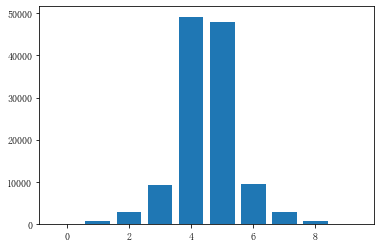

In [34]:
n = 10  # 分段数量
xt = xt - np.mean(xt)                     # 去直流分量（也叫零均值化处理）
max_value = np.abs( xt[np.argmax( np.abs(xt) )] )   # 确定幅值绝对值最大值max_value
count_num_list = [] 
for i in range(n):
    interval_len = max_value*2/n          # 在幅值区间[-max_value, max_value]内等分划分成n个小区间，区间长度为interval_len
    low = -max_value + i*interval_len     # 第i个幅值小区间[-max_value+i * interval_len, max_value+(i+1) * interval_len]的下限
    high = -max_value + (i+1)*interval_len    # 第i个幅值小区间[-max_value+i * interval_len, max_value+(i+1) * interval_len]的上限
    count_num = interval_num_count(data=xt, low=low, high=high)  # 统计落入该区间的幅值个数count_num
    count_num_list.append(count_num)      # 将n个区间统计的个数count_num形成一个列表count_num_list
plt.bar(x=range( len(count_num_list) ), height=count_num_list) # 绘制柱状图，即得到幅值概率密度图

是不是已成雏形，有正态分布形状了。只是原始区间分成了10份，看不太出来

下面分成100份

<BarContainer object of 100 artists>

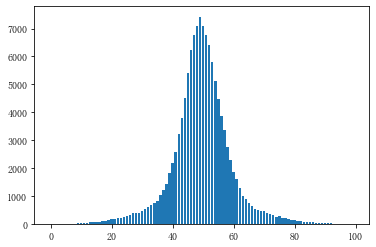

In [35]:
n = 100
xt = xt - np.mean(xt)                     # 去直流分量（也叫零均值化处理）
max_value = np.abs( xt[np.argmax( np.abs(xt) )] )   # 确定幅值绝对值最大值max_value
count_num_list = [] 
for i in range(n):
    interval_len = max_value*2/n          # 在幅值区间[-max_value, max_value]内等分划分成n个小区间，区间长度为interval_len
    low = -max_value + i*interval_len     # 第i个幅值小区间[-max_value+i * interval_len, max_value+(i+1) * interval_len]的下限
    high = -max_value + (i+1)*interval_len    # 第i个幅值小区间[-max_value+i * interval_len, max_value+(i+1) * interval_len]的上限
    count_num = interval_num_count(data=xt, low=low, high=high)  # 统计落入该区间的幅值个数count_num
    count_num_list.append(count_num)      # 将n个区间统计的个数count_num形成一个列表count_num_list
plt.bar(x=range( len(count_num_list) ), height=count_num_list) # 绘制柱状图，即得到幅值概率密度图

这下有正态分布那味了。不得不说这个形状还挺优美的。

## 封装成一个plt_amp_prob_density_fun()函数

In [39]:
def plt_amp_prob_density_fun(data, n):
    '''
    fun: 绘制幅值概率密度函数
    param data: 输入数据，1维array
    param n: 分割成段数的数量
    return: 绘制幅值概率密度函数
    '''
    max_value = np.abs( xt[np.argmax( np.abs(xt) )] ) #
    count_num = []
    for i in range(n):
        interval = max_value*2/n              # 区间长度为interval_len
        low = -max_value + i*interval         # 区间下限
        high = -max_value + (i+1)*interval    # 区间上限
        count = interval_num_count(data=xt, low=low, high=high)  # 统计落入该区间的幅值个数
        count_num.append(count)
    plt.bar(x=range( len(count_num) ), height=count_num)  # 绘制柱状图
    plt.show()

### 滚动体故障轴承幅值概率密度函数分析

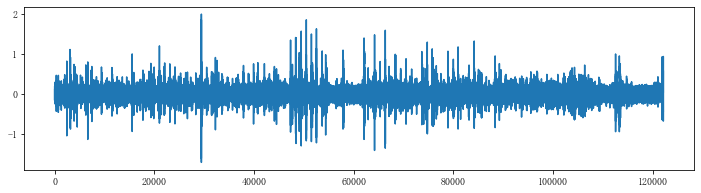

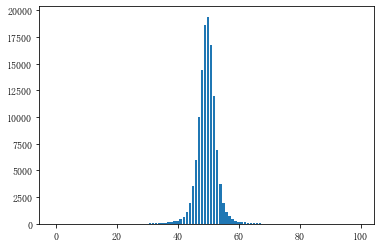

In [41]:
file_path = r'E:/研究生/pytorch/CSDN代码/fault_diagnosis_signal_processing/第4篇-包络谱/1730_12k_0.014-Ball.mat'
xt = data_acquision(file_path)
plt.figure(figsize=(12,3))
plt.plot(xt)
plt.show()
n = 100      # 设定分成份数
plt_amp_prob_density_fun(data=xt, n=n)

此时的正态分布形状比较瘦小，峭度K大于3。K值大于3时，说明信号中冲击成分幅值增大。

### 外圈故障轴承幅值概率密度函数

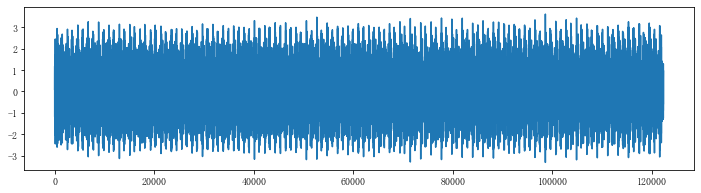

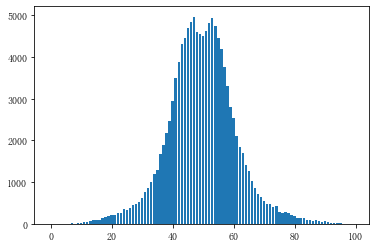

In [42]:
file_path = r'E:/研究生/pytorch/CSDN代码/fault_diagnosis_signal_processing/第4篇-包络谱/1730_12k_0.007-OuterRace3.mat'
xt = data_acquision(file_path)
plt.figure(figsize=(12,3))
plt.plot(xt)
plt.show()
n = 100      # 设定分成份数
plt_amp_prob_density_fun(data=xt, n=n)

在顶部出现了第1节介绍时说的盆型漏斗

### 正常状态轴承幅值概率密度函数分析

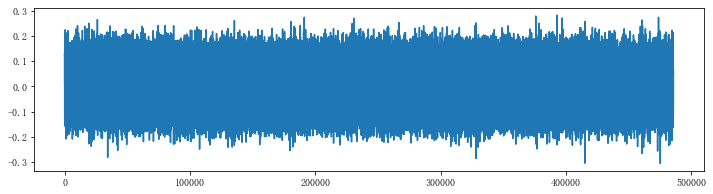

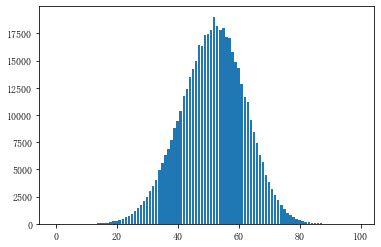

In [45]:
file_path = r'E:/研究生/pytorch/CSDN代码/fault_diagnosis_signal_processing/第4篇-包络谱/1730_48k_Normal.mat'
xt = data_acquision(file_path)
plt.figure(figsize=(12,3))
plt.plot(xt)
plt.show()
n = 100      # 设定分成份数
plt_amp_prob_density_fun(data=xt, n=n)

看着与标准正态分布挺像的

## 结论

与正常状态轴承的幅值概率密度函数相比，其故障状态有两种情况
- 第一种情况：概率密度函数偏瘦小，定量分析及为峭度K大于3
- 第二种情况：概率密度函数顶部出现盆型漏斗，该现象预示存在故障